(lca-dc)=
# Sind Gleichstromnetze in Gebäuden klimafreundlicher?

:::{admonition} **Lernziele**
- Gleichstromnetze für IT und Beleuchtung bezüglich Lebenszykluseffekten bewerten
- mithilfe von Studien aus der Literatur
- um die systemische Herangehensweise auf andere Beispiele übertragen zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Mikronetze mit integrierter erneuerbarer Erzeugung

*Definition*: ein *microgrid* (deutsch Mikronetz) mit integrierter erneuerbarer Erzeugung umfasst einen Netzabschnitt zur Versorgung eines oder mehrerer in räumlicher Nähe gelegener Gebäude sowie erneuerbare Erzeugung. Manche microgrids lassen sich netzunabhängig betreiben. Stand der Technik ist es, microgrids mit Wechselstrom zu betreiben (230 V bzw. 400 V). Forschungsdemonstratoren zeigen, dass auch Gleichstrom für solche microgrids nutzbar ist.

## Klimawirkung von Gleichstrom- vs. Wechselstrom-Mikronetzen

{cite:p}`kockel_reducing_2019` hat dies für Bürogebäude mit Photovoltaik an Fassade und Dach verglichen.

Dadurch, dass Netzteile für IT ([weiteres zu IT siehe auch im Anhang](http://jfmay.gitlab.io/systemtechnik-fuer-energieeffizienz/nb/SYE-IT.html)) und Beleuchtung nun nicht mehr von Wechselspannung auf Gleichspannung umsetzen müssen, sondern nur noch von einem Gleichspannungniveau auf ein anderes, spart man Komponenten ein. Dies geschieht analog bei den Frequenzumrichtern für die Lüftermotoren, die durch Wechselrichter ersetzt werden können. {cite:p}`kockel_reducing_2019` ermittelt damit neben einer Reduzierung der herstellungsrelevanten Treibhausgase auch eine erhebliche Verbesserung der Ressourceneffizienz durch Materialeinsparungen.

Auch die photovoltaische Energieerzeugung verbessert deutlich den Fußabdruck der Nutzenergie über eine angenommene Lebensdauer in einem Beispielsystem:

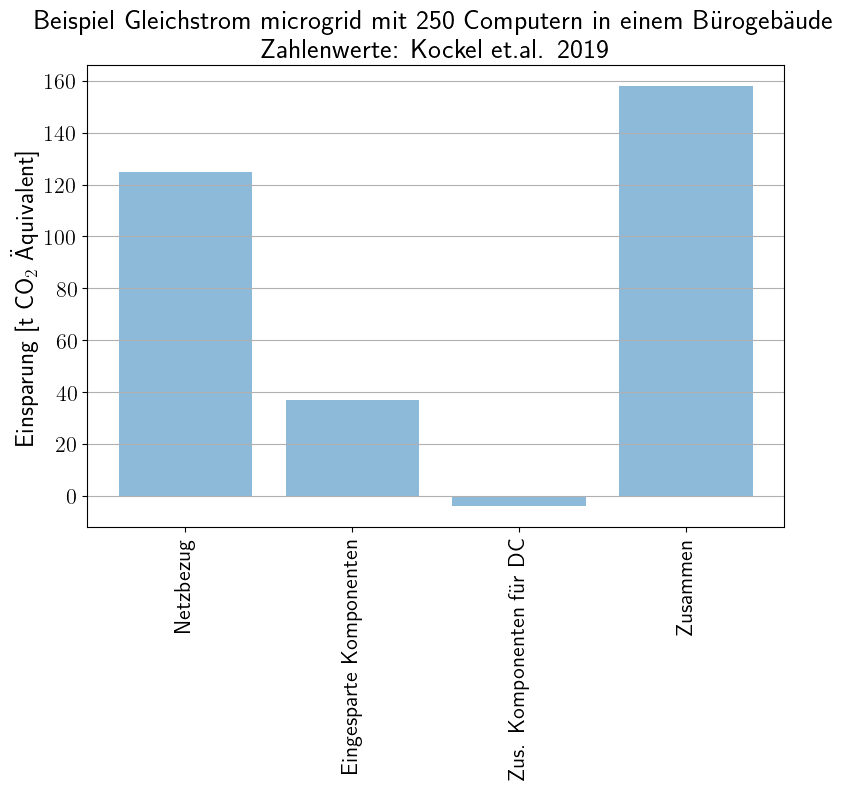

In [3]:
energy_from_public_grid = 125 # t CO2 eq
removed_components = 37 # t CO2 eq
additional_components = -4 # t CO2 eq
total = energy_from_public_grid+removed_components+additional_components
labels = ('Netzbezug', 'Eingesparte Komponenten', 'Zus. Komponenten für DC', 'Zusammen')
y_pos = np.arange(len(labels))
co2eq = [energy_from_public_grid, removed_components, additional_components, total]
plt.figure(figsize=(9,6))
plt.bar(y_pos, co2eq, align='center', alpha=0.5)
plt.xticks(y_pos,labels,rotation=90)
plt.ylabel('Einsparung [t CO$_2$ Äquivalent]')
plt.title('Beispiel Gleichstrom microgrid mit 250 Computern in einem Bürogebäude\nZahlenwerte: Kockel et.al. 2019')
plt.grid(axis='y')
plt.show()

## Gleichstromnetze in der Industrie

Das Forschungsprojekt DC-Industrie hat gezeigt, dass sich DC-Netze auch für Produktionsumgebungen eignen {cite:p}`hartwig_stammberger_dc-industrie_2022`: Ein 650 V DC Bus koppelt Supercaps, Batterien und Photovoltaik mit elektrischen Verbrauchern. Statt Frequenzumrichtern, die häufig auch nicht bidirektional arbeiten, können Maschinen dann mit Wechselrichtern versorgt werden, die Bremsenergie zurück ins Netz speisen können. Ebenso versorgt das DC-Netz passive Lasten (Licht, Wärme), Hilfsenergieversorgung (Sensoren, Steuerung, etc.) sowie die Steckdosen. 

Energie-Effizienz-Vorteile, die das Projekt {cite:p}`holger_borcherding_gleichstrom_2020` fand: 
- 2-4% weniger Verluste
- Nutzung der gesamten Bremsenergie
- Direktverbrauch erneuerbarer Energie
- Spitzenlast-Reduktion bis 80% durch Supercaps und Batterie

Dadurch verringerte das Projekt den Kupferbedarf (dünnere Leitungen, da weniger Blindleistung übertragen wird) und sparte Platz ein. 

Ökonomisch sind DC-Komponenten noch nicht so konkurrenzfähig, da Gleichstrom-*microgrids* nicht sehr verbreitet sind. Dadurch sind Komponenten teurer, weil die Stückzahl nicht so hoch ist - obwohl sie weniger Material benötigen. Jedoch steigt das Interesse daran {cite:p}`angela_schmid_markt_2022`.

Zu beachten ist zudem, dass die Installateure für Gleichstrom-*microgrids* speziell geschult sein müssen. Da sie ohnehin für Photovoltaik und Elektromobilität inzwischen mehr mit Gleichstrom zu tun haben, erscheint dies kein weiter Weg mehr zu sein.

:::{bibliography}
:filter: docname in docnames
:::